In [1]:
import ROOT
import matplotlib.pyplot as plt
import mplhep as hep
from tqdm import tqdm
plt.style.use(hep.style.CMS)
import os

Welcome to JupyROOT 6.28/00


In [2]:
def ReadEfficiency(CutFlowSteps, samples, cmtdir, conf, suffix, cat, ver):
    CutFlowEfficiency = {0: []}
    CutFlowEfficiency.update({step: [] for step in CutFlowSteps.keys()})
    for sample in tqdm(samples):
        indir = f'{cmtdir}/{conf}/{sample}{suffix}/{cat}/{ver}'
        tTree = ROOT.TChain("Events")
        tTree.Add(indir+"/data*.root")
        df = ROOT.RDataFrame(tTree)
        CutFlowEfficiency[0].append(df.Count().GetValue())
        for step in CutFlowSteps.keys():
            step_name = CutFlowSteps[step][0]
            df_cut = df.Filter(f"{step_name}")
            CutFlowEfficiency[step].append(df_cut.Count().GetValue())
    return CutFlowEfficiency

In [54]:
def PlotEfficiency(CutFlowSteps, CutFlowEfficiency, fancy_name, channel, res_mass, outdir, channel_name, ymax=14):
    fig, ax = plt.subplots(figsize=(10,10))
    cmap = plt.get_cmap('Set1')
    colors = [cmap(-1), 'red', 'royalblue', cmap(2), cmap(7), cmap(4), 'blueviolet', 'deepskyblue', 'limegreen']
    if channel_name == 'TauTau':
        colors = [cmap(-1), 'red', cmap(2), cmap(7), cmap(4), 'blueviolet', 'deepskyblue', 'limegreen']
    for step in CutFlowSteps.keys():
        step_label = CutFlowSteps[step][1]
        efficiency = [x / y for x, y in zip(CutFlowEfficiency[step], CutFlowEfficiency[0])]
        if len(mass_points) != len(efficiency):
            ax.errorbar(1, efficiency[0], lw=2, linestyle='', marker='^', color=colors[step])
            ax.errorbar(mass_points, efficiency[1:], lw=2, linestyle='', marker='o', color=colors[step], label=step_label)
        else:
            ax.errorbar(mass_points, efficiency, label=step_label, lw=2, linestyle='', marker='o', color=colors[step])
    hep.cms.label(data=True, label="Private Work")
    plt.text(0.95, 0.97, fancy_name + " - " + channel, ha="right", va="top", transform=plt.gca().transAxes, color="black")
    plt.xlabel(rf"$M_{{{res_mass}}}$ [GeV]")
    plt.ylabel(r"Efficiency")
    plt.grid()
    plt.legend(loc='upper left', fontsize=14)
    plt.yscale('log')
    plt.ylim(0.0004,ymax)
    plt.savefig(outdir + f'/{res_sample}_{channel_name}_CutFlow.png')
    plt.savefig(outdir + f'/{res_sample}_{channel_name}_CutFlow.pdf')

# CutFlow study for ZZbbtt

In [13]:
cmtdir = '/data_CMS/cms/vernazza/cmt/PreprocessRDF/'
conf = 'ul_2018_ZZ_v12'
res_sample = 'GluGluToXToZZTo2B2Tau'
sm_sample = 'zz_sl_signal'
fancy_name = r"$ZZ_{bb\tau\tau}$"
res_mass = "X"
suffix = ''
cat = 'cat_base_selection'
ver = 'prod_240712_CutFlow'
outdir = f"/grid_mnt/data__data.polcms/cms/vernazza/FrameworkNanoAOD/hhbbtt-analysis/nicePlots/CutFlowEfficiency/{ver}"
os.system(" mkdir -p " + outdir)
mass_points = [ 200, 210, 220, 230, 240, 250, 260, 270, 280, 300, 320, 350, 360, 400, 450, 500, 550,
                600, 650, 700, 750, 800, 850, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700,
                1800, 1900, 2000, 2200, 2400, 2500, 2600, 2800, 3000, 3500, 4000, 4500, 5000]

samples = [sm_sample] + [f'{res_sample}_M{m}' for m in mass_points]

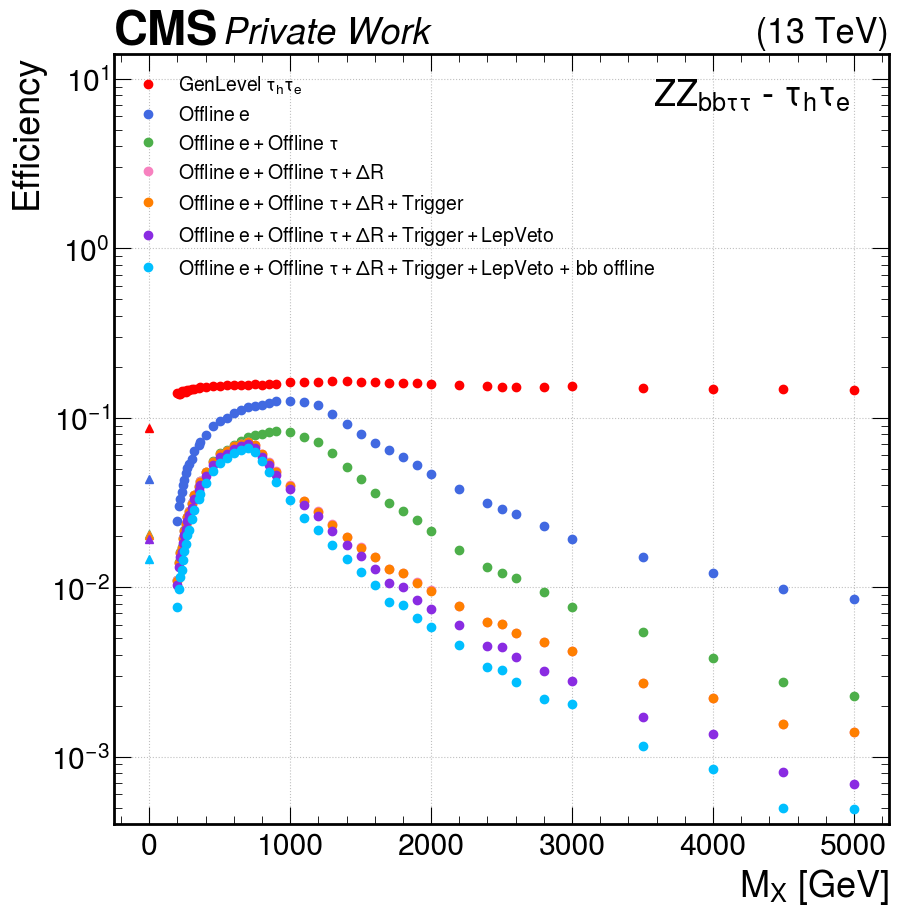

In [52]:
genPairType = 1
channel = '$\\tau_h\\tau_e$'
channel_name = 'ETau'
CutFlowSteps_ETau = {
    1: [f'GenPairType == {genPairType}', '$GenLevel\; \\tau_h\\tau_e$'],
    2: [f'pairType_skip_ETau_tauOff_ETau_dR_ETau_Trg_ETau_LepVeto == {genPairType}', '$Offline\; e$'],
    3: [f'pairType_skip_ETau_dR_ETau_Trg_ETau_LepVeto == {genPairType}', '$Offline\; e + Offline\; \\tau$'],
    4: [f'pairType_skip_ETau_Trg_ETau_LepVeto == {genPairType}', '$Offline\; e + Offline\; \\tau + \\Delta R$'],
    5: [f'pairType_skip_ETau_LepVeto == {genPairType}', '$Offline\; e + Offline\; \\tau + \\Delta R + Trigger$'],
    6: [f'pairType == {genPairType}', '$Offline\; e + Offline\; \\tau + \\Delta R + Trigger + LepVeto$'],
    7: [f'(pairType == {genPairType}) && (((bjet1_JetIdx != -1) && (bjet2_JetIdx != -1)) || (isBoosted))', 
         '$Offline\; e + Offline\; \\tau + \\Delta R + Trigger + LepVeto$ + bb offline'],
}

# CutFlowEfficiency_ETau = ReadEfficiency(CutFlowSteps_ETau, samples, cmtdir, conf, suffix, cat, ver)
PlotEfficiency(CutFlowSteps_ETau, CutFlowEfficiency_ETau, fancy_name, channel, res_mass, outdir, channel_name, ymax=14)

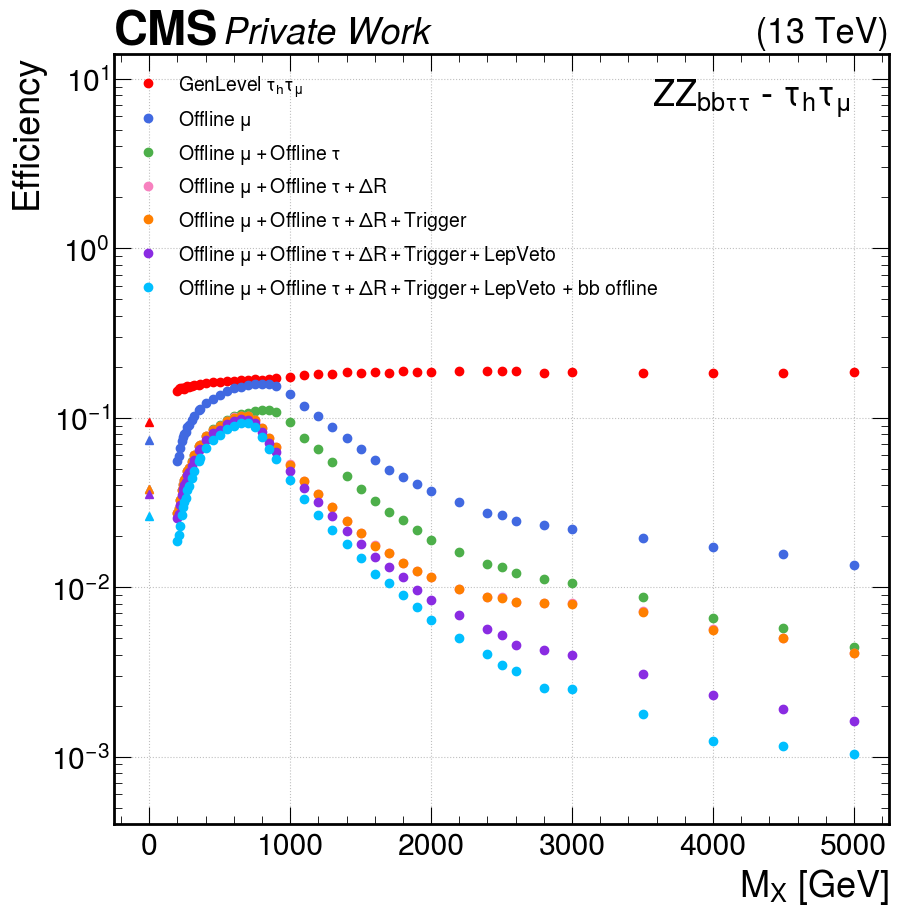

In [51]:
genPairType = 0
channel = '$\\tau_h\\tau_\\mu$'
channel_name = 'MuTau'
CutFlowSteps_MuTau = {
    1: [f'GenPairType == {genPairType}', '$GenLevel\; \\tau_h\\tau_\\mu$'],
    2: [f'pairType_skip_MuTau_tauOff_MuTau_dR_MuTau_Trg_MuTau_LepVeto == {genPairType}', '$Offline\; \\mu$'],
    3: [f'pairType_skip_MuTau_dR_MuTau_Trg_MuTau_LepVeto == {genPairType}', '$Offline\; \\mu + Offline\; \\tau$'],
    4: [f'pairType_skip_MuTau_Trg_MuTau_LepVeto == {genPairType}', '$Offline\; \\mu + Offline\; \\tau + \\Delta R$'],
    5: [f'pairType_skip_MuTau_LepVeto == {genPairType}', '$Offline\; \\mu + Offline\; \\tau + \\Delta R + Trigger$'],
    6: [f'pairType == {genPairType}', '$Offline\; \\mu + Offline\; \\tau + \\Delta R + Trigger + LepVeto$'],
    7: [f'(pairType == {genPairType}) && (((bjet1_JetIdx != -1) && (bjet2_JetIdx != -1)) || (isBoosted))', 
         '$Offline\; \\mu + Offline\; \\tau + \\Delta R + Trigger + LepVeto$ + bb offline']
}

# CutFlowEfficiency_MuTau = ReadEfficiency(CutFlowSteps_MuTau, samples, cmtdir, conf, suffix, cat, ver)
PlotEfficiency(CutFlowSteps_MuTau, CutFlowEfficiency_MuTau, fancy_name, channel, res_mass, outdir, channel_name, ymax=14)


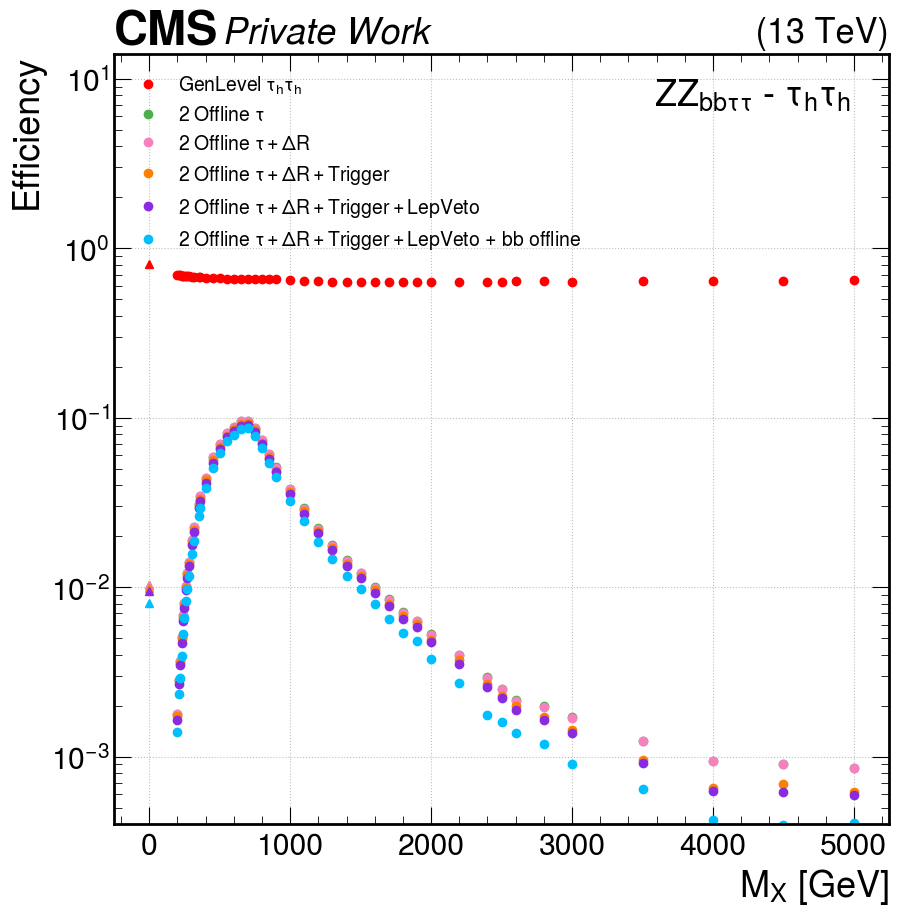

In [55]:
genPairType = 2
channel = '$\\tau_h\\tau_h$'
channel_name = 'TauTau'
CutFlowSteps_TauTau = {
    1: [f'GenPairType == {genPairType}', '$GenLevel\; \\tau_h\\tau_h$'],
    2: [f'pairType_skip_TauTau_dR_TauTau_Trg_TauTau_LepVeto == {genPairType}', '$2\;Offline\; \\tau$'],
    3: [f'pairType_skip_TauTau_Trg_TauTau_LepVeto == {genPairType}', '$2\;Offline\; \\tau + \\Delta R$'],
    4: [f'pairType_skip_TauTau_LepVeto == {genPairType}', '$2\;Offline\; \\tau + \\Delta R + Trigger$'],
    5: [f'pairType == {genPairType}', '$2\;Offline\; \\tau + \\Delta R + Trigger + LepVeto$'],
    6: [f'(pairType == {genPairType}) && (((bjet1_JetIdx != -1) && (bjet2_JetIdx != -1)) || (isBoosted))', 
         '$2\;Offline\; \\tau + \\Delta R + Trigger + LepVeto$ + bb offline']
}

# CutFlowEfficiency_TauTau = ReadEfficiency(CutFlowSteps_TauTau, samples, cmtdir, conf, suffix, cat, ver)
PlotEfficiency(CutFlowSteps_TauTau, CutFlowEfficiency_TauTau, fancy_name, channel, res_mass, outdir, channel_name, ymax=14)

# CutFlow study for ZbbHtt

In [56]:
cmtdir = '/data_CMS/cms/vernazza/cmt/PreprocessRDF/'
conf = 'ul_2018_ZbbHtt_v12'
res_sample = 'ZprimeToZH_ZToBB_HToTauTau'
sm_sample = 'zh_zbb_htt_signal'
fancy_name = r"$Z_{bb}H_{\tau\tau}$"
res_mass = "Z'"
suffix = ''
cat = 'cat_base_selection'
ver = 'prod_240712_CutFlow'
outdir = f"/grid_mnt/data__data.polcms/cms/vernazza/FrameworkNanoAOD/hhbbtt-analysis/nicePlots/CutFlowEfficiency/{ver}"
os.system(" mkdir -p " + outdir)
mass_points = [500, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000, 2500, 3000, 3500, 4000]

samples = [sm_sample] + [f'{res_sample}_M{m}' for m in mass_points]

  0%|          | 0/14 [00:00<?, ?it/s]

100%|██████████| 14/14 [00:59<00:00,  4.22s/it]


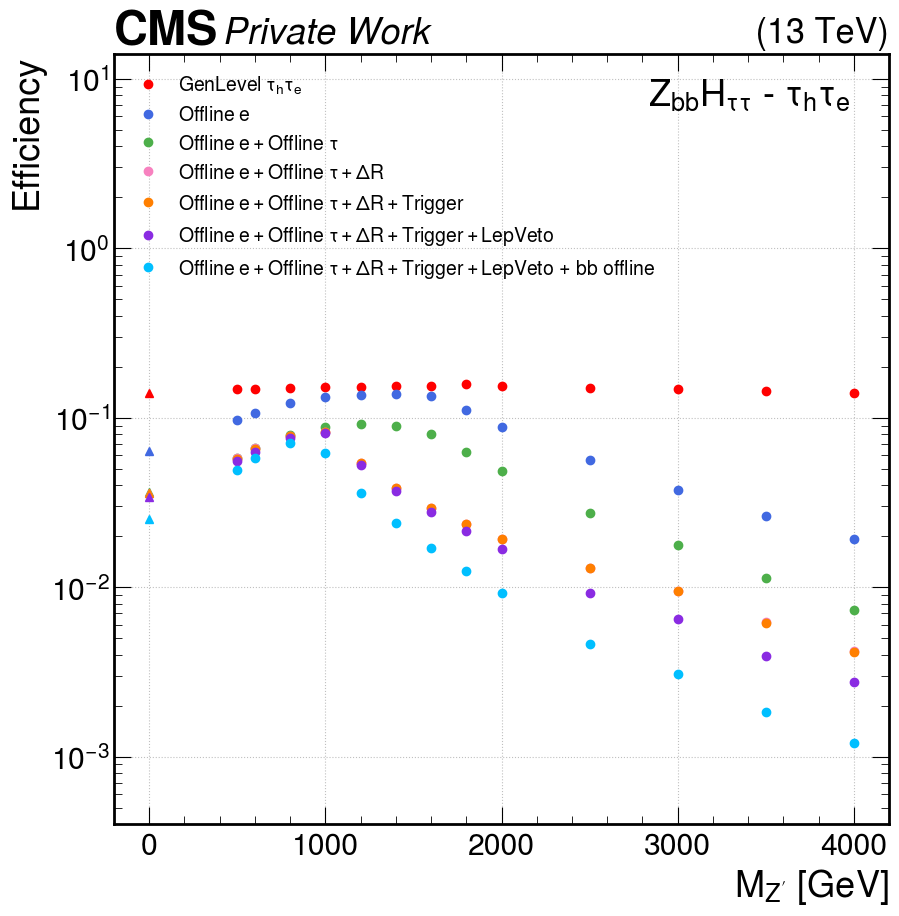

In [58]:
genPairType = 1
channel = '$\\tau_h\\tau_e$'
channel_name = 'ETau'
CutFlowSteps_ETau = {
    1: [f'GenPairType == {genPairType}', '$GenLevel\; \\tau_h\\tau_e$'],
    2: [f'pairType_skip_ETau_tauOff_ETau_dR_ETau_Trg_ETau_LepVeto == {genPairType}', '$Offline\; e$'],
    3: [f'pairType_skip_ETau_dR_ETau_Trg_ETau_LepVeto == {genPairType}', '$Offline\; e + Offline\; \\tau$'],
    4: [f'pairType_skip_ETau_Trg_ETau_LepVeto == {genPairType}', '$Offline\; e + Offline\; \\tau + \\Delta R$'],
    5: [f'pairType_skip_ETau_LepVeto == {genPairType}', '$Offline\; e + Offline\; \\tau + \\Delta R + Trigger$'],
    6: [f'pairType == {genPairType}', '$Offline\; e + Offline\; \\tau + \\Delta R + Trigger + LepVeto$'],
    7: [f'(pairType == {genPairType}) && (((bjet1_JetIdx != -1) && (bjet2_JetIdx != -1)) || (isBoosted))', 
         '$Offline\; e + Offline\; \\tau + \\Delta R + Trigger + LepVeto$ + bb offline'],
}

CutFlowEfficiency_ETau = ReadEfficiency(CutFlowSteps_ETau, samples, cmtdir, conf, suffix, cat, ver)
PlotEfficiency(CutFlowSteps_ETau, CutFlowEfficiency_ETau, fancy_name, channel, res_mass, outdir, channel_name, ymax=14)

100%|██████████| 14/14 [00:29<00:00,  2.08s/it]


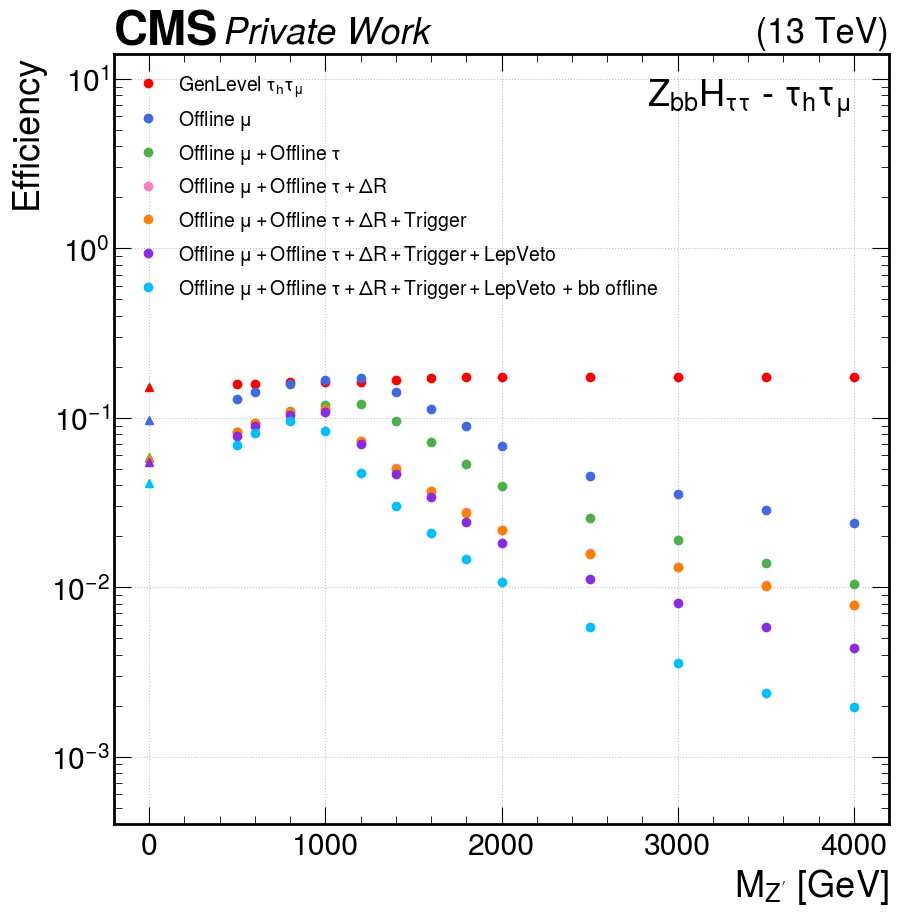

In [59]:
genPairType = 0
channel = '$\\tau_h\\tau_\\mu$'
channel_name = 'MuTau'
CutFlowSteps_MuTau = {
    1: [f'GenPairType == {genPairType}', '$GenLevel\; \\tau_h\\tau_\\mu$'],
    2: [f'pairType_skip_MuTau_tauOff_MuTau_dR_MuTau_Trg_MuTau_LepVeto == {genPairType}', '$Offline\; \\mu$'],
    3: [f'pairType_skip_MuTau_dR_MuTau_Trg_MuTau_LepVeto == {genPairType}', '$Offline\; \\mu + Offline\; \\tau$'],
    4: [f'pairType_skip_MuTau_Trg_MuTau_LepVeto == {genPairType}', '$Offline\; \\mu + Offline\; \\tau + \\Delta R$'],
    5: [f'pairType_skip_MuTau_LepVeto == {genPairType}', '$Offline\; \\mu + Offline\; \\tau + \\Delta R + Trigger$'],
    6: [f'pairType == {genPairType}', '$Offline\; \\mu + Offline\; \\tau + \\Delta R + Trigger + LepVeto$'],
    7: [f'(pairType == {genPairType}) && (((bjet1_JetIdx != -1) && (bjet2_JetIdx != -1)) || (isBoosted))', 
         '$Offline\; \\mu + Offline\; \\tau + \\Delta R + Trigger + LepVeto$ + bb offline']
}

CutFlowEfficiency_MuTau = ReadEfficiency(CutFlowSteps_MuTau, samples, cmtdir, conf, suffix, cat, ver)
PlotEfficiency(CutFlowSteps_MuTau, CutFlowEfficiency_MuTau, fancy_name, channel, res_mass, outdir, channel_name, ymax=14)

100%|██████████| 14/14 [00:19<00:00,  1.39s/it]


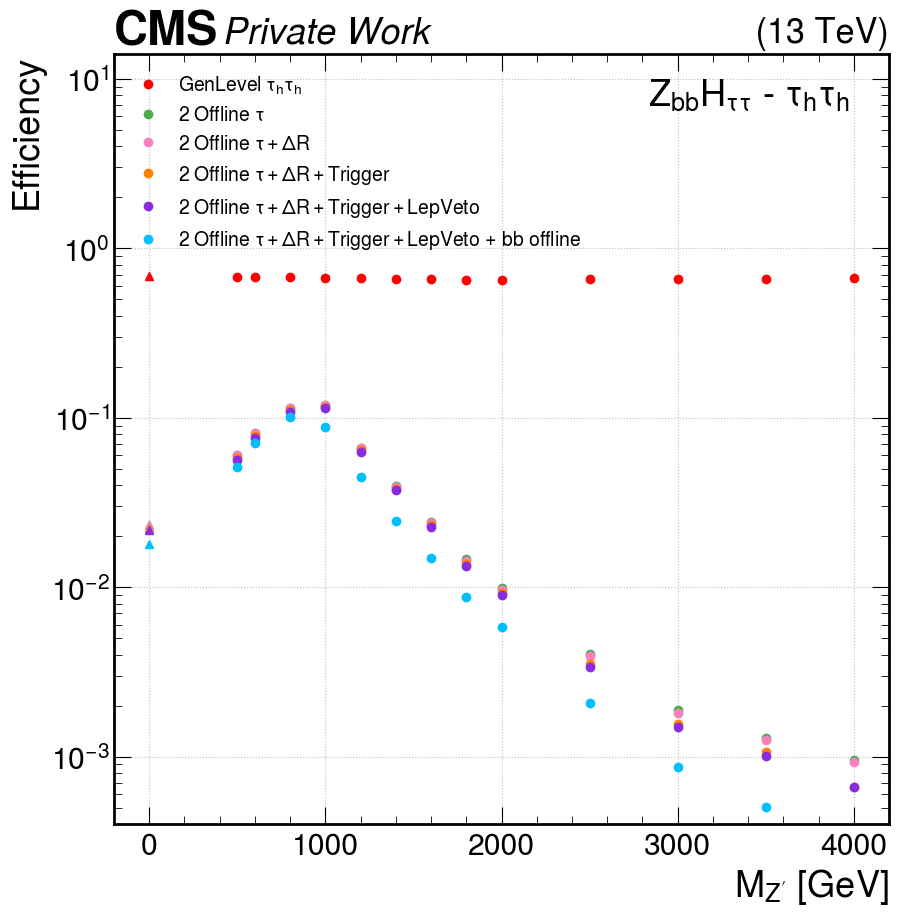

In [60]:
genPairType = 2
channel = '$\\tau_h\\tau_h$'
channel_name = 'TauTau'
CutFlowSteps_TauTau = {
    1: [f'GenPairType == {genPairType}', '$GenLevel\; \\tau_h\\tau_h$'],
    2: [f'pairType_skip_TauTau_dR_TauTau_Trg_TauTau_LepVeto == {genPairType}', '$2\;Offline\; \\tau$'],
    3: [f'pairType_skip_TauTau_Trg_TauTau_LepVeto == {genPairType}', '$2\;Offline\; \\tau + \\Delta R$'],
    4: [f'pairType_skip_TauTau_LepVeto == {genPairType}', '$2\;Offline\; \\tau + \\Delta R + Trigger$'],
    5: [f'pairType == {genPairType}', '$2\;Offline\; \\tau + \\Delta R + Trigger + LepVeto$'],
    6: [f'(pairType == {genPairType}) && (((bjet1_JetIdx != -1) && (bjet2_JetIdx != -1)) || (isBoosted))', 
         '$2\;Offline\; \\tau + \\Delta R + Trigger + LepVeto$ + bb offline']
}

CutFlowEfficiency_TauTau = ReadEfficiency(CutFlowSteps_TauTau, samples, cmtdir, conf, suffix, cat, ver)
PlotEfficiency(CutFlowSteps_TauTau, CutFlowEfficiency_TauTau, fancy_name, channel, res_mass, outdir, channel_name, ymax=14)

# CutFlow study for ZttHbb

In [61]:
cmtdir = '/data_CMS/cms/vernazza/cmt/PreprocessRDF/'
conf = 'ul_2018_ZttHbb_v12'
res_sample = 'ZprimeToZH_ZToTauTau_HToBB'
sm_sample = 'zh_ztt_hbb_signal'
fancy_name = r"$Z_{\tau\tau}H_{bb}$"
res_mass = "Z'"
suffix = ''
cat = 'cat_base_selection'
ver = 'prod_240712_CutFlow'
outdir = f"/grid_mnt/data__data.polcms/cms/vernazza/FrameworkNanoAOD/hhbbtt-analysis/nicePlots/CutFlowEfficiency/{ver}"
os.system(" mkdir -p " + outdir)
mass_points = [500, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000, 2500, 3000, 3500, 4000]

samples = [sm_sample] + [f'{res_sample}_M{m}' for m in mass_points]

100%|██████████| 14/14 [01:01<00:00,  4.41s/it]


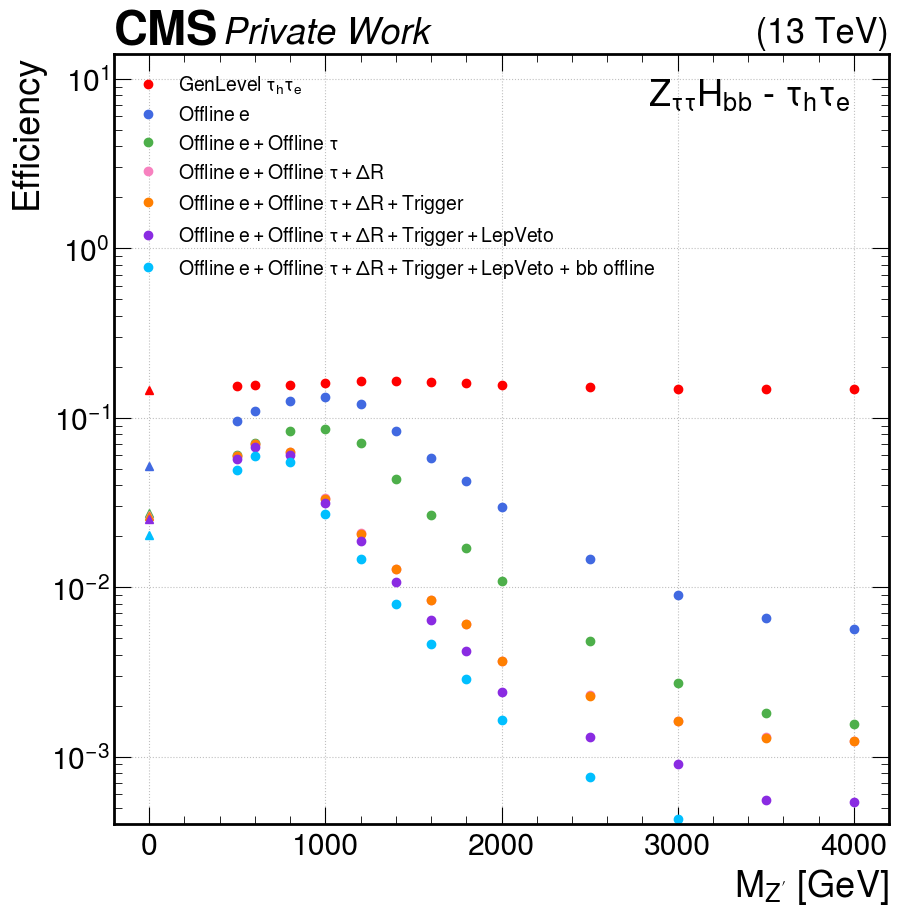

In [62]:
genPairType = 1
channel = '$\\tau_h\\tau_e$'
channel_name = 'ETau'
CutFlowSteps_ETau = {
    1: [f'GenPairType == {genPairType}', '$GenLevel\; \\tau_h\\tau_e$'],
    2: [f'pairType_skip_ETau_tauOff_ETau_dR_ETau_Trg_ETau_LepVeto == {genPairType}', '$Offline\; e$'],
    3: [f'pairType_skip_ETau_dR_ETau_Trg_ETau_LepVeto == {genPairType}', '$Offline\; e + Offline\; \\tau$'],
    4: [f'pairType_skip_ETau_Trg_ETau_LepVeto == {genPairType}', '$Offline\; e + Offline\; \\tau + \\Delta R$'],
    5: [f'pairType_skip_ETau_LepVeto == {genPairType}', '$Offline\; e + Offline\; \\tau + \\Delta R + Trigger$'],
    6: [f'pairType == {genPairType}', '$Offline\; e + Offline\; \\tau + \\Delta R + Trigger + LepVeto$'],
    7: [f'(pairType == {genPairType}) && (((bjet1_JetIdx != -1) && (bjet2_JetIdx != -1)) || (isBoosted))', 
         '$Offline\; e + Offline\; \\tau + \\Delta R + Trigger + LepVeto$ + bb offline'],
}

CutFlowEfficiency_ETau = ReadEfficiency(CutFlowSteps_ETau, samples, cmtdir, conf, suffix, cat, ver)
PlotEfficiency(CutFlowSteps_ETau, CutFlowEfficiency_ETau, fancy_name, channel, res_mass, outdir, channel_name, ymax=14)

100%|██████████| 14/14 [00:30<00:00,  2.15s/it]


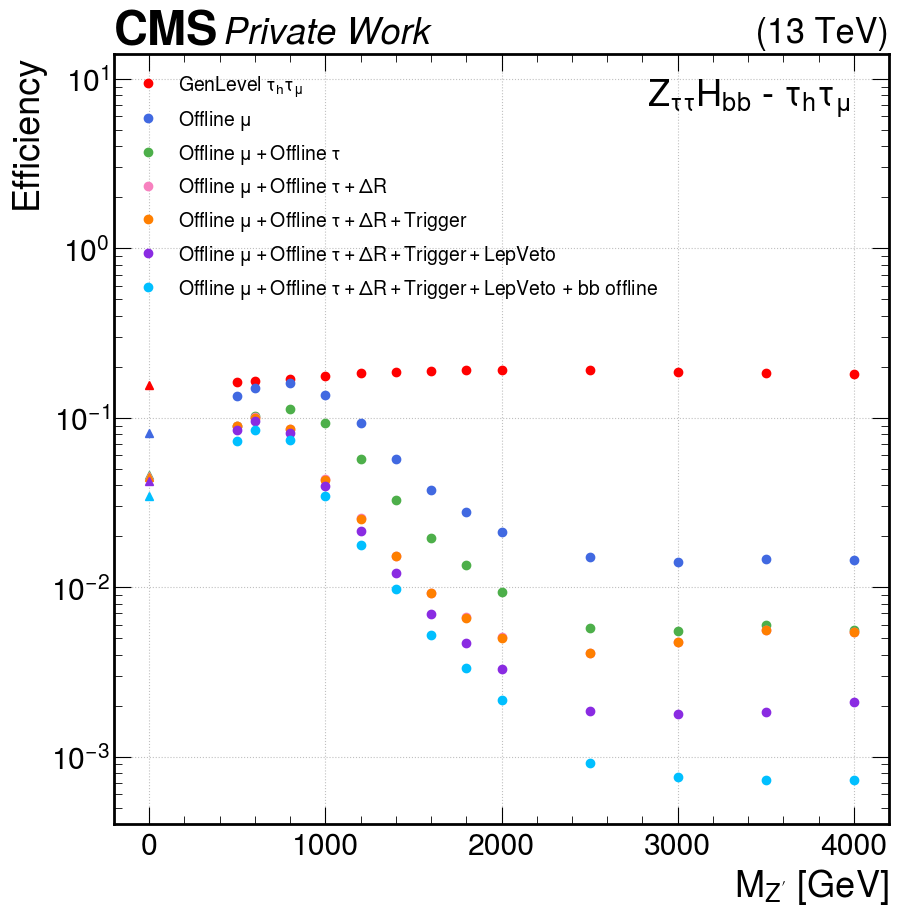

In [63]:
genPairType = 0
channel = '$\\tau_h\\tau_\\mu$'
channel_name = 'MuTau'
CutFlowSteps_MuTau = {
    1: [f'GenPairType == {genPairType}', '$GenLevel\; \\tau_h\\tau_\\mu$'],
    2: [f'pairType_skip_MuTau_tauOff_MuTau_dR_MuTau_Trg_MuTau_LepVeto == {genPairType}', '$Offline\; \\mu$'],
    3: [f'pairType_skip_MuTau_dR_MuTau_Trg_MuTau_LepVeto == {genPairType}', '$Offline\; \\mu + Offline\; \\tau$'],
    4: [f'pairType_skip_MuTau_Trg_MuTau_LepVeto == {genPairType}', '$Offline\; \\mu + Offline\; \\tau + \\Delta R$'],
    5: [f'pairType_skip_MuTau_LepVeto == {genPairType}', '$Offline\; \\mu + Offline\; \\tau + \\Delta R + Trigger$'],
    6: [f'pairType == {genPairType}', '$Offline\; \\mu + Offline\; \\tau + \\Delta R + Trigger + LepVeto$'],
    7: [f'(pairType == {genPairType}) && (((bjet1_JetIdx != -1) && (bjet2_JetIdx != -1)) || (isBoosted))', 
         '$Offline\; \\mu + Offline\; \\tau + \\Delta R + Trigger + LepVeto$ + bb offline']
}

CutFlowEfficiency_MuTau = ReadEfficiency(CutFlowSteps_MuTau, samples, cmtdir, conf, suffix, cat, ver)
PlotEfficiency(CutFlowSteps_MuTau, CutFlowEfficiency_MuTau, fancy_name, channel, res_mass, outdir, channel_name, ymax=14)

  0%|          | 0/14 [00:00<?, ?it/s]

100%|██████████| 14/14 [00:19<00:00,  1.43s/it]


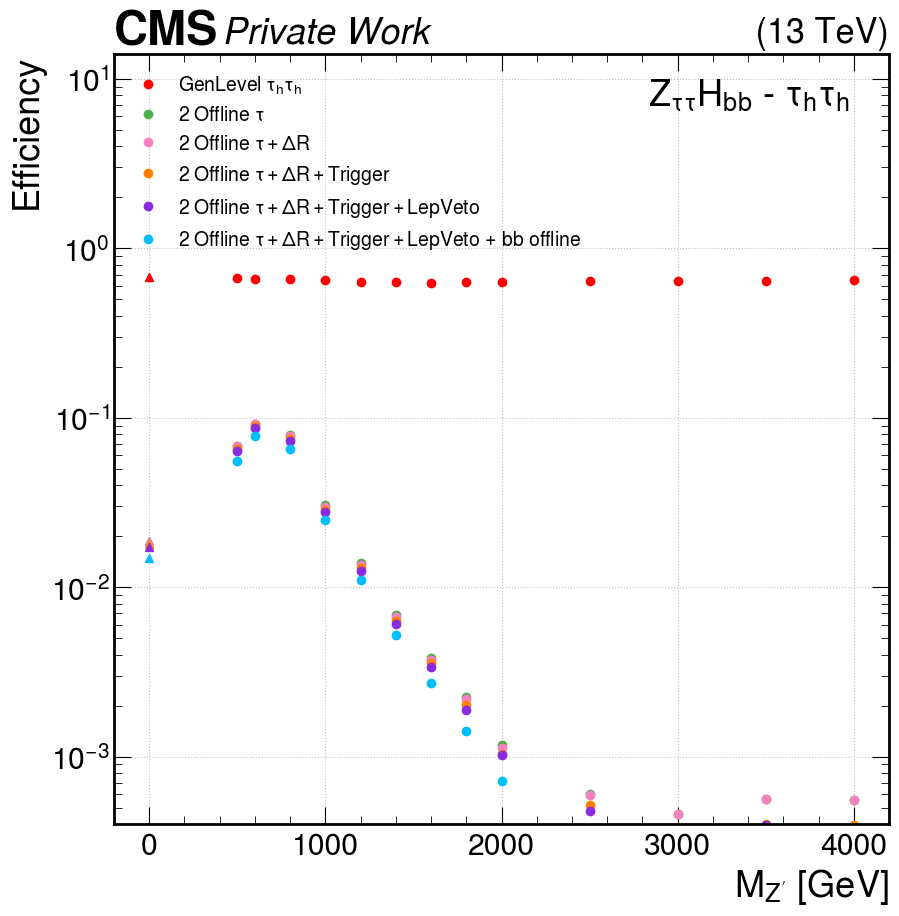

In [64]:
genPairType = 2
channel = '$\\tau_h\\tau_h$'
channel_name = 'TauTau'
CutFlowSteps_TauTau = {
    1: [f'GenPairType == {genPairType}', '$GenLevel\; \\tau_h\\tau_h$'],
    2: [f'pairType_skip_TauTau_dR_TauTau_Trg_TauTau_LepVeto == {genPairType}', '$2\;Offline\; \\tau$'],
    3: [f'pairType_skip_TauTau_Trg_TauTau_LepVeto == {genPairType}', '$2\;Offline\; \\tau + \\Delta R$'],
    4: [f'pairType_skip_TauTau_LepVeto == {genPairType}', '$2\;Offline\; \\tau + \\Delta R + Trigger$'],
    5: [f'pairType == {genPairType}', '$2\;Offline\; \\tau + \\Delta R + Trigger + LepVeto$'],
    6: [f'(pairType == {genPairType}) && (((bjet1_JetIdx != -1) && (bjet2_JetIdx != -1)) || (isBoosted))', 
         '$2\;Offline\; \\tau + \\Delta R + Trigger + LepVeto$ + bb offline']
}

CutFlowEfficiency_TauTau = ReadEfficiency(CutFlowSteps_TauTau, samples, cmtdir, conf, suffix, cat, ver)
PlotEfficiency(CutFlowSteps_TauTau, CutFlowEfficiency_TauTau, fancy_name, channel, res_mass, outdir, channel_name, ymax=14)

# OLD: CutFlow study for ZZbbtt (boostedTau)

In [15]:
cmtdir = '/data_CMS/cms/vernazza/cmt/PreprocessRDF/'
conf = 'ul_2018_ZZ_v12'
sample = 'GluGluToXToZZTo2B2Tau'
fancy_name = r"$ZZ_{bb\tau\tau}$"
res_mass = "X"
suffix = '_aux'
cat = 'cat_base_selection'
ver = 'prod_240624_CutFlow'
outdir = f"/grid_mnt/data__data.polcms/cms/vernazza/FrameworkNanoAOD/hhbbtt-analysis/nicePlots/CutFlowSplit/{ver}"
os.system(" mkdir -p " + outdir)
mass_points = [ 200, 210, 220, 230, 240, 250, 260, 270, 280, 300, 320, 350, 360, 400, 450, 500, 550,
                600, 650, 700, 750, 800, 850, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700,
                1800, 1900, 2000, 2200, 2400, 2500, 2600, 2800, 3000, 3500, 4000, 4500, 5000]

genPairType = 2
CutFlowSteps_TauTau = {
    1: ['pairType', '$Current\; DiTau\; Workflow\;$'],
}
CutFlowEfficiency_TauTau = {0: []}
CutFlowEfficiency_TauTau.update({step: [] for step in CutFlowSteps_TauTau.keys()})
for mass in tqdm(mass_points):
    indir = f'{cmtdir}/{conf}/{sample}_M{mass}{suffix}/{cat}/{ver}'
    tTree = ROOT.TChain("Events")
    tTree.Add(indir+"/data*.root")
    df = ROOT.RDataFrame(tTree)
    CutFlowEfficiency_TauTau[0].append(df.Count().GetValue())
    for step in CutFlowSteps_TauTau.keys():
        step_name = CutFlowSteps_TauTau[step][0]
        df_cut = df.Filter(f"{step_name} == {genPairType}")
        CutFlowEfficiency_TauTau[step].append(df_cut.Count().GetValue())

genPairType = 4
CutFlowSteps_BTauTau = {
    # 1: ['pairType_skip_BTauTau_tauOff_BTauTau_Trg', '$Gen\; \\tau_h\\tau_h\; (!DiTau\; Iso)$'],
    2: ['pairType_skip_BTauTau_Trg', '$Current\; DiTau\; Workflow\; + 2\; Offline\; Boosted\; \\tau$'],
    3: ['pairType', '$Current\; DiTau\; Workflow\; + 2\; Offline\; Boosted\; \\tau + SingleTau\; Trigger$'],
}
CutFlowEfficiency_BTauTau = {0: []}
CutFlowEfficiency_BTauTau.update({step: [] for step in CutFlowSteps_BTauTau.keys()})
for mass in tqdm(mass_points):
    indir = f'{cmtdir}/{conf}/{sample}_M{mass}{suffix}/{cat}/{ver}'
    tTree = ROOT.TChain("Events")
    tTree.Add(indir+"/data*.root")
    df = ROOT.RDataFrame(tTree)
    CutFlowEfficiency_BTauTau[0].append(df.Count().GetValue())
    for step in CutFlowSteps_BTauTau.keys():
        step_name = CutFlowSteps_BTauTau[step][0]
        df_cut = df.Filter(f"{step_name} == {genPairType}")
        CutFlowEfficiency_BTauTau[step].append(df_cut.Count().GetValue())

100%|██████████| 45/45 [00:16<00:00,  2.81it/s]


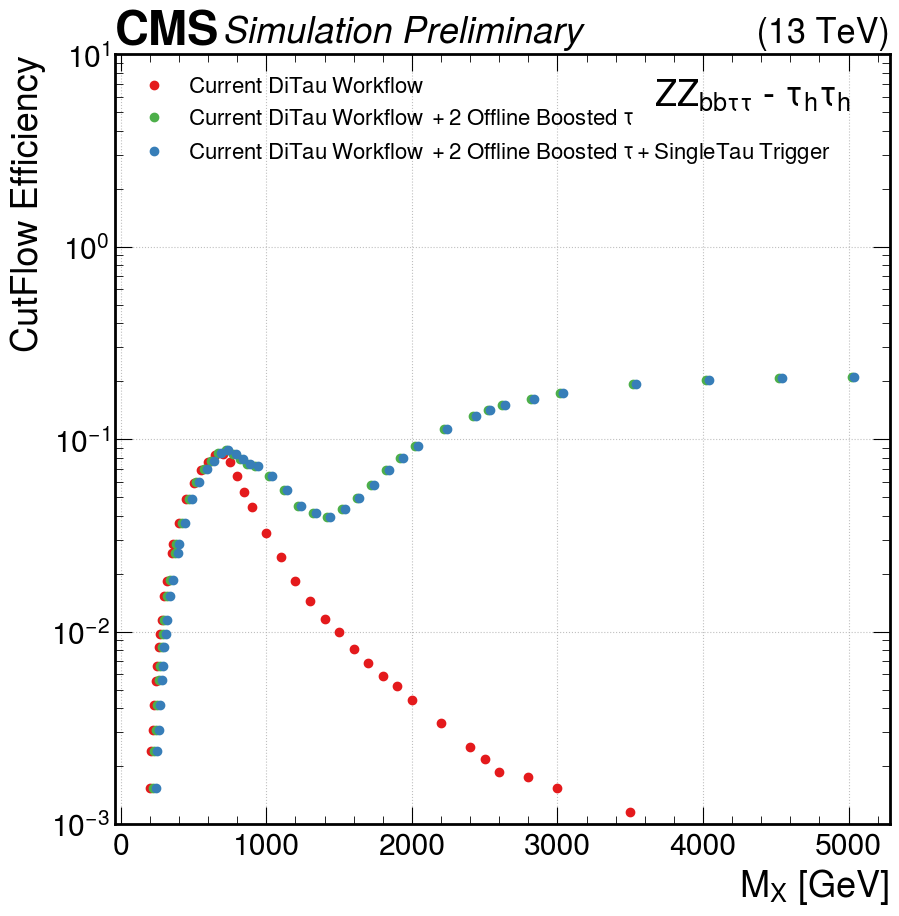

In [16]:
from matplotlib.transforms import Affine2D
channel = '$\\tau_h\\tau_h$'
fig, ax = plt.subplots(figsize=(10,10))
cmap = plt.get_cmap('Set1')
for step in CutFlowSteps_TauTau.keys():
    step_label = CutFlowSteps_TauTau[step][1]
    efficiency = [x / y for x, y in zip(CutFlowEfficiency_TauTau[step], CutFlowEfficiency_TauTau[0])]
    ax.errorbar(mass_points, efficiency, label=step_label, lw=2, linestyle='', marker='o', color=cmap(0))

for step in CutFlowSteps_BTauTau.keys():
    step_label = CutFlowSteps_BTauTau[step][1]
    befficiency = [x / y for x, y in zip(CutFlowEfficiency_BTauTau[step], CutFlowEfficiency_BTauTau[0])]
    trans1 = Affine2D().translate(+0*(step), 0.0) + ax.transData
    if step > 1: trans1 = Affine2D().translate(+20*(step-1), 0.0) + ax.transData
    ax.errorbar(mass_points, [i+j for i,j in zip(efficiency, befficiency)], label=step_label, lw=2, linestyle='', marker='o', color=cmap(4-step), transform=trans1)

hep.cms.label("Preliminary")
plt.text(0.95, 0.97, fancy_name + " - " + channel, ha="right", va="top", transform=plt.gca().transAxes, color="black")
plt.xlabel(rf"$M_{{{res_mass}}}$ [GeV]")
plt.ylabel(r"CutFlow Efficiency")
plt.grid()
plt.legend(loc='upper left', fontsize=16)
plt.yscale('log')
plt.ylim(0.001,10)
plt.savefig(outdir + f'/{sample}_aux_BTauTau_CutFlow.png')
plt.savefig(outdir + f'/{sample}_aux_BTauTau_CutFlow.pdf')

In [43]:
cmtdir = '/data_CMS/cms/vernazza/cmt/PreprocessRDF/'
conf = 'ul_2018_ZbbHtt_v12'
sample = 'ZprimeToZH_ZToBB_HToTauTau'
fancy_name = r"$Z_{bb}H_{\tau\tau}$"
res_mass = "Z'"
suffix = '_aux'
cat = 'cat_base_selection'
ver = 'prod_240624_CutFlow'
mass_points = [500, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000, 2500, 3000, 3500, 4000]

genPairType = 4
CutFlowSteps_BTauTau = {
    1: ['pairType_skip_BTauTau_tauOff_BTauTau_Trg', '$GenLevel\; \\tau_h\\tau_h\; (!DiTau\; Iso)$'],
    2: ['pairType_skip_BTauTau_Trg', '$GenLevel\; \\tau_h\\tau_h\; (!DiTau\; Iso)\; + Two\; Offline\; Boosted\; \\tau$'],
    3: ['pairType', '$GenLevel\; \\tau_h\\tau_h\; (!DiTau\; Iso)\; + Two\; Offline\; Boosted\; \\tau + Trigger$'],
}
CutFlowEfficiency_TauTau = {0: []}
CutFlowEfficiency_TauTau.update({step: [] for step in CutFlowSteps_BTauTau.keys()})
for mass in tqdm(mass_points):
    indir = f'{cmtdir}/{conf}/{sample}_M{mass}{suffix}/{cat}/{ver}'
    tTree = ROOT.TChain("Events")
    tTree.Add(indir+"/data*.root")
    df = ROOT.RDataFrame(tTree)
    CutFlowEfficiency_TauTau[0].append(df.Count().GetValue())
    for step in CutFlowSteps_BTauTau.keys():
        step_name = CutFlowSteps_BTauTau[step][0]
        df_cut = df.Filter(f"{step_name} == {genPairType}")
        CutFlowEfficiency_TauTau[step].append(df_cut.Count().GetValue())

100%|██████████| 13/13 [00:07<00:00,  1.81it/s]


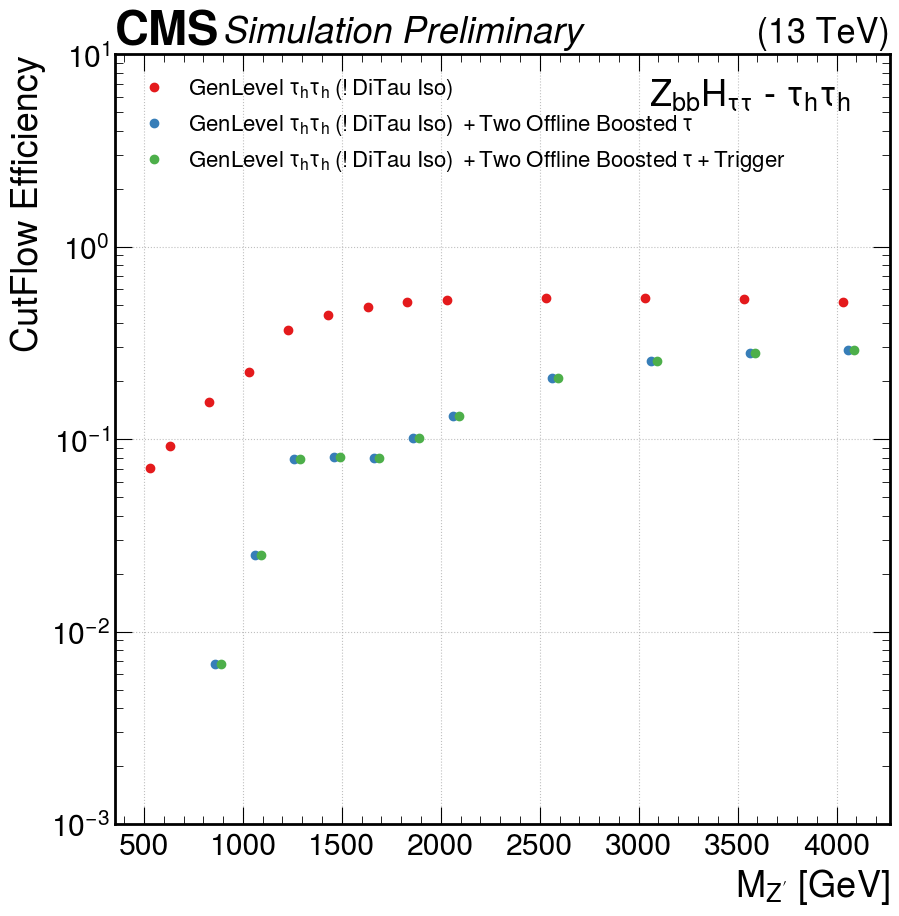

In [44]:
from matplotlib.transforms import Affine2D
channel = '$\\tau_h\\tau_h$'
fig, ax = plt.subplots(figsize=(10,10))
cmap = plt.get_cmap('Set1')
for step in CutFlowSteps_BTauTau.keys():
    step_label = CutFlowSteps_BTauTau[step][1]
    efficiency = [x / y for x, y in zip(CutFlowEfficiency_TauTau[step], CutFlowEfficiency_TauTau[0])]
    trans1 = Affine2D().translate(+30*(step), 0.0) + ax.transData
    ax.errorbar(mass_points, efficiency, label=step_label, lw=2, linestyle='', marker='o', color=cmap(step-1), transform=trans1)
hep.cms.label("Preliminary")
plt.text(0.95, 0.97, fancy_name + " - " + channel, ha="right", va="top", transform=plt.gca().transAxes, color="black")
plt.xlabel(rf"$M_{{{res_mass}}}$ [GeV]")
plt.ylabel(r"CutFlow Efficiency")
plt.grid()
plt.legend(loc='upper left', fontsize=16)
plt.yscale('log')
plt.ylim(0.001,10)
plt.savefig(outdir + f'/{sample}_aux_BTauTau_CutFlow.png')
plt.savefig(outdir + f'/{sample}_aux_BTauTau_CutFlow.pdf')

In [45]:
cmtdir = '/data_CMS/cms/vernazza/cmt/PreprocessRDF/'
conf = 'ul_2018_ZttHbb_v12'
sample = 'ZprimeToZH_ZToTauTau_HToBB'
fancy_name = r"$Z_{\tau\tau}H_{bb}$"
res_mass = "Z'"
suffix = '_aux'
cat = 'cat_base_selection'
ver = 'prod_240624_CutFlow'
mass_points = [500, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000, 2500, 3000, 3500, 4000]

genPairType = 4
CutFlowSteps_BTauTau = {
    1: ['pairType_skip_BTauTau_tauOff_BTauTau_Trg', '$GenLevel\; \\tau_h\\tau_h\; (!DiTau\; Iso)$'],
    2: ['pairType_skip_BTauTau_Trg', '$GenLevel\; \\tau_h\\tau_h\; (!DiTau\; Iso)\; + Two\; Offline\; Boosted\; \\tau$'],
    3: ['pairType', '$GenLevel\; \\tau_h\\tau_h\; (!DiTau\; Iso)\; + Two\; Offline\; Boosted\; \\tau + Trigger$'],
}
CutFlowEfficiency_TauTau = {0: []}
CutFlowEfficiency_TauTau.update({step: [] for step in CutFlowSteps_BTauTau.keys()})
for mass in tqdm(mass_points):
    indir = f'{cmtdir}/{conf}/{sample}_M{mass}{suffix}/{cat}/{ver}'
    tTree = ROOT.TChain("Events")
    tTree.Add(indir+"/data*.root")
    df = ROOT.RDataFrame(tTree)
    CutFlowEfficiency_TauTau[0].append(df.Count().GetValue())
    for step in CutFlowSteps_BTauTau.keys():
        step_name = CutFlowSteps_BTauTau[step][0]
        df_cut = df.Filter(f"{step_name} == {genPairType}")
        CutFlowEfficiency_TauTau[step].append(df_cut.Count().GetValue())

100%|██████████| 13/13 [00:09<00:00,  1.36it/s]


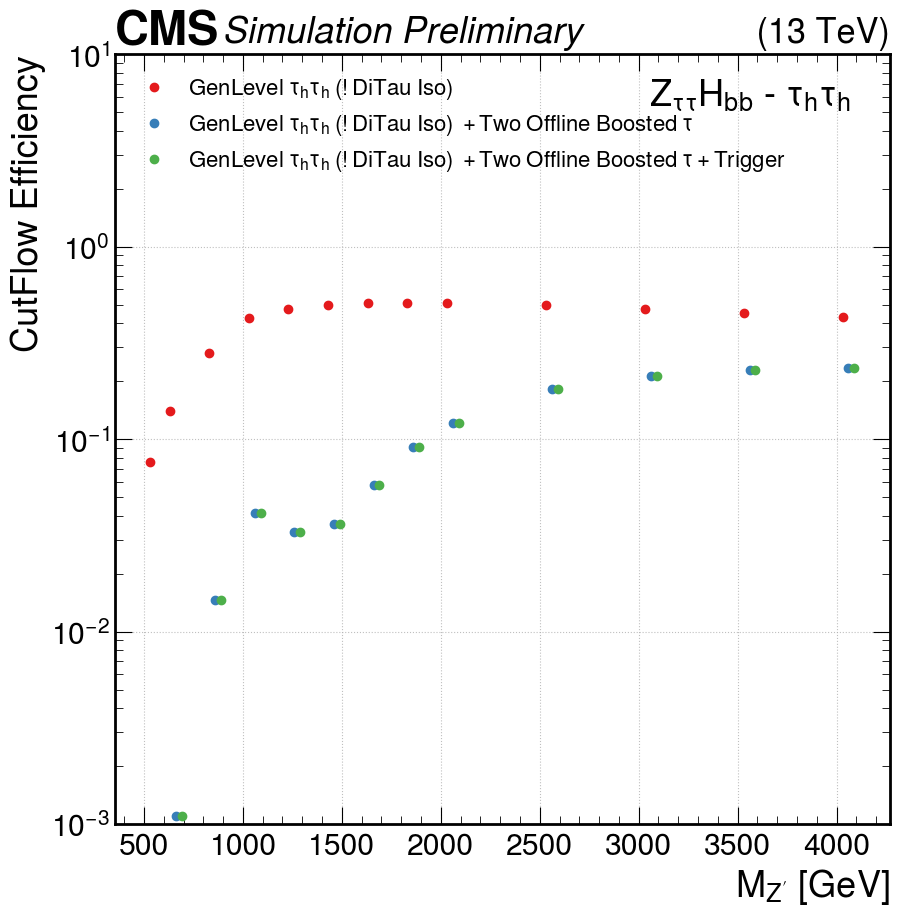

In [46]:
from matplotlib.transforms import Affine2D
channel = '$\\tau_h\\tau_h$'
fig, ax = plt.subplots(figsize=(10,10))
cmap = plt.get_cmap('Set1')
for step in CutFlowSteps_BTauTau.keys():
    step_label = CutFlowSteps_BTauTau[step][1]
    efficiency = [x / y for x, y in zip(CutFlowEfficiency_TauTau[step], CutFlowEfficiency_TauTau[0])]
    trans1 = Affine2D().translate(+30*(step), 0.0) + ax.transData
    ax.errorbar(mass_points, efficiency, label=step_label, lw=2, linestyle='', marker='o', color=cmap(step-1), transform=trans1)
hep.cms.label("Preliminary")
plt.text(0.95, 0.97, fancy_name + " - " + channel, ha="right", va="top", transform=plt.gca().transAxes, color="black")
plt.xlabel(rf"$M_{{{res_mass}}}$ [GeV]")
plt.ylabel(r"CutFlow Efficiency")
plt.grid()
plt.legend(loc='upper left', fontsize=16)
plt.yscale('log')
plt.ylim(0.001,10)
plt.savefig(outdir + f'/{sample}_aux_BTauTau_CutFlow.png')
plt.savefig(outdir + f'/{sample}_aux_BTauTau_CutFlow.pdf')